# veri okuma ve anlama 

In [1]:
#twitter verilerini aldık latin harfle olduğunu gösterip ve okuduk

import pandas as pd

data=pd.read_csv('/Users/tugbaaydemir/Documents/BILGISAYAR/VI.bYAPAYZEKA/NLP/twitter.csv',encoding="latin1")

In [2]:
pd.set_option('display.max_columns',26)
#pd.set_option('display.max_rows',200)

In [3]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
data.shape

(20050, 26)

#  veri temizleme

In [6]:
#cinsiyet ve description olan kısmı aldık diğerlerini sildik
data=pd.concat([data.gender,data.description],axis=1)

In [7]:
data.head(100)

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
95,brand,NaN
96,male,Calm And Cool
97,female,A retro modernist suffering from unsightly vis...
98,brand,Multiple Sclerosis lives here in Brant County ...


In [8]:
#eksik veriler var
data.isnull().sum()

gender           97
description    3744
dtype: int64

In [9]:
#cinsiyetdeki eksik veriler
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [10]:
data[data['gender']=='unknown'].head(10)

,gender,description
19,unknown,NaN
92,unknown,"Boring, boring Chelsea."
115,unknown,"GB for 15 years,not usually a twitter twat, fo..."
116,unknown,NaN
145,unknown,NaN
164,unknown,NaN
197,unknown,|unknown|
201,unknown,Current mood: Jet Black Heart.\n\nI only go in...
223,unknown,"SE Asian, Goat Kid, 13 March. ¾öÔ¾÷ø¾ª«_©ÛâS..."
244,unknown,NaN


In [11]:
#descriptiondaki eksik veriler
data[data['description'].isna()].head(10)

,gender,description
15,female,NaN
18,male,NaN
19,unknown,NaN
49,brand,NaN
54,male,NaN
90,female,NaN
95,brand,NaN
110,female,NaN
116,unknown,NaN
122,male,NaN


In [12]:
#eksik veri iceren tweetleri sildik 20000 den yaklaşık 16000 e düştü
data.dropna(axis=0 ,inplace=True)

In [13]:
data.shape

(16224, 2)

In [14]:
#kadınları 1 erkekleri 0 yapalım
data.gender=[1 if each=="female" else 0 for each in data.gender]

In [15]:
data.head(3)

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all


# regular expression

In [16]:
#regular expression RE  "[^a-zA-Z]"
import re
#4 .tweeti aldık
first_description=data.description[4]

In [17]:
#4 .twit
first_description

'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx'

In [18]:
re.sub("[^ae]"," ",'Tugba Aydemir')

'    a    e   '

In [19]:
re.sub("[^aeu]"," ",'Tugba,..Aydemir')

' u  a      e   '

In [20]:
re.sub("[^aeu]","?",'Tugba,..Aydemir')

'?u??a??????e???'

In [21]:
#nokta, iki nokta gibi anlamı olmayan ifadeleri 
#a dan z'ye olmayan kelime veya işaretleri boşluk ile değiştirdik
description=re.sub("[^a-zA-Z]"," ",first_description)

In [22]:
#tüm harfleri küçülttük
description=description.lower()

In [23]:
#goruldugu uzere ifadede istenen degisiklikler gerceklesti
description

'ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx'

# nltk bolumu

In [24]:
#Natural language tool kit kütüphanesini import ediyoruz.
#download ile corpus diye bir  klasöre indiriliyor 
#Ve corpus klasöründen import ediliyor.
#Kalan cümleleri liste haline  getiriyoruz. 

import nltk #natural language tool kit
nltk.download("stopwords")#corpus diye bir klasöre indiriliyor
from nltk.corpus import stopwords #sonra  corpus klasöründen import ediliyor


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tugbaaydemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#dosya buraya indi
stopwords

<WordListCorpusReader in '/Users/tugbaaydemir/nltk_data/corpora/stopwords'>

In [26]:
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [27]:
#calismadi yerine description = description.split()  yazdik
#description = nltk.word_tokenize(description)

In [28]:
description = description.split() #kelime kelime ayırıyoruz
 
#split yerine tokenizer kullanabiliriz
#split sadece boşluklara göre ayırır 

In [29]:
#kelime-kelime ayrildi.Ilk 10 kelimesini yazdiralim
description[:10]

['ricky',
 'wilson',
 'the',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'the',
 'best',
 'band']

In [30]:
#Gereksiz kelimeleri attık 
#sınıflandırma işlemini zorlandıracak kelimeleri çıkarttık(the,and gibi kelimeler) 
#burada veri kumesi ingilizce oldugu icin stopwords.words("english") kullandik
#diger diller icin stopwords.words("ilgili dil") kullanilabilir

description=[word for word in description if not word in set(stopwords.words("english")) ]

In [31]:
description[:10]

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'best',
 'band',
 'xxxx',
 'thank']

In [32]:
#lemmatization kullanacağız bunun amacı kökleri bulmak loved=> love 
#lemmatization kökleri bulmak loved=> love
 
import nltk as nlp
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tugbaaydemir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
#Harf harf ayırdık. 
lemma = nlp.WordNetLemmatizer()
description=[lemma.lemmatize(word) for  word in description]

In [34]:
description[:10]

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chief',
 'best',
 'band',
 'xxxx',
 'thank']

In [35]:
# texti preproses yaptık kelime haline getirdik tekrar cumle yapalim
description=" ".join(description)

In [36]:
description

'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx'

# yapilanlari tum veriye uygulama

In [37]:
#hepsi küçük kelime kökler halinde gereksiz işaretler ve and, the gibi anlamsız kelimeler yok
 
#bu adıma kadar yapılanların hepsini datada uygulayacağız.
#bunun için for döngüsüne  alacağız.Böylelikte bu data temizlenmiş oldu. 

description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = description.split()
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [38]:
#bag of Words metodu için sklearn kütüphanesini import edeceğiz 

from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin 
max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()


In [39]:
#Ve en sık kullanılan 5000 kelime yazdırılmıştır 
print("EN SIK KULLANILAN {} KELIME GRUBU:\n {}".format(max_features,count_vectorizer.get_feature_names()))

EN SIK KULLANILAN 5000 KELIME GRUBU:
 ['aa', 'aaron', 'abc', 'ability', 'able', 'absolute', 'absolutely', 'abuse', 'ac', 'academia', 'academic', 'academy', 'acc', 'accept', 'accepted', 'access', 'accessory', 'accident', 'account', 'accountant', 'accounting', 'ace', 'achieve', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addition', 'address', 'admin', 'administrator', 'admirer', 'adopted', 'adoption', 'adorable', 'adore', 'adult', 'advance', 'advanced', 'advancing', 'advantage', 'adventure', 'adventurer', 'adventurous', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advisory', 'advocacy', 'advocate', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'affiliation', 'affordable', 'aficionado', 'afraid', 'africa', 'african', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', 'agency', 'agender', 'agent

In [40]:
data.head()

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [41]:
# y ile verimizin 0. İndeksindeki cinsiyet degerlerini aldik
# values ile numpy arraya dönüştürdük. 
y = data.iloc[:,0].values   # male or female classes
x = sparce_matrix

In [43]:
x.shape

(16224, 5000)

In [44]:
# egitim-test kumesine  ayirdik
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

# naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model=nb.fit(x_train,y_train)

In [46]:
# prediction
y_pred = nb_model.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Doğruluk Oranı(Accuracy Rate) hesaplanir 
accuracy_score(y_test, y_pred)

0.51879235982748

In [48]:
nb.score(x_test, y_test)

0.51879235982748

In [49]:
#karmasiklik matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[363, 689],
       [ 92, 479]])

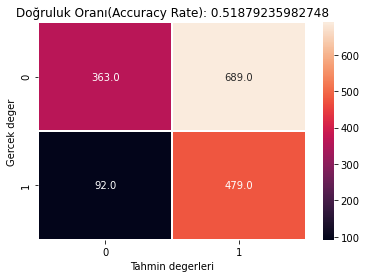

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt=".1f", linewidths=.3)

plt.ylabel('Gercek deger')
plt.xlabel('Tahmin degerleri')
plt.title('Doğruluk Oranı(Accuracy Rate): {0}'.format(nb.score(x_test, y_test)), size = 12)
plt.show()

In [51]:
#karmasiklik matrisinin detayli analizi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.35      0.48      1052
           1       0.41      0.84      0.55       571

    accuracy                           0.52      1623
   macro avg       0.60      0.59      0.52      1623
weighted avg       0.66      0.52      0.51      1623



Max_features değerini ne kadar arttırıp deneyerek başarı oranını arttırabiliriz.değeri arttırmak  başarı oranını düşürebilir de. Naive bayes modeli bu uygulama için çok da uygun değildir.

# knn

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#k degeri 2 alinarak modele uygulanir
knn = KNeighborsClassifier(3)
knn_model = knn.fit(x_train, y_train)

In [53]:
#tahmin degerleri hesaplanir
y_pred = knn_model.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Doğruluk Oranı(Accuracy Rate) hesaplanir 
accuracy_score(y_test, y_pred)

0.6013555144793592

In [55]:
#karmasiklik matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[709, 343],
       [304, 267]])

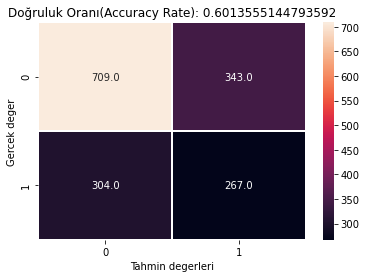

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt=".1f", linewidths=.3)

plt.ylabel('Gercek deger')
plt.xlabel('Tahmin degerleri')
plt.title('Doğruluk Oranı(Accuracy Rate): {0}'.format(knn.score(x_test, y_test)), size = 12)
plt.show()

In [57]:
#karmasiklik matrisinin detayli analizi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69      1052
           1       0.44      0.47      0.45       571

    accuracy                           0.60      1623
   macro avg       0.57      0.57      0.57      1623
weighted avg       0.61      0.60      0.60      1623



# lojistik regresyon

In [58]:
# LogisticRegression sınıfından bir nesne ürettik
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = "liblinear")
lr_model=lr.fit(x_train, y_train)

In [59]:
#tahmin degerleri hesaplanir
y_pred  = lr_model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Doğruluk Oranı(Accuracy Rate) hesaplanir 
accuracy_score(y_test, y_pred)

0.6980899568699939

In [61]:
#karmasiklik matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[864, 188],
       [302, 269]])

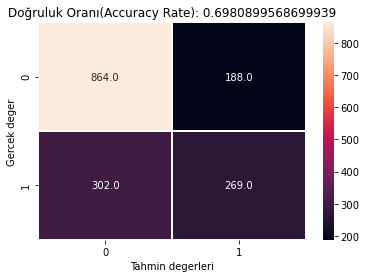

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt=".1f", linewidths=.3)

plt.ylabel('Gercek deger')
plt.xlabel('Tahmin degerleri')
plt.title('Doğruluk Oranı(Accuracy Rate): {0}'.format(lr.score(x_test, y_test)), size = 12)
plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1052
           1       0.59      0.47      0.52       571

    accuracy                           0.70      1623
   macro avg       0.66      0.65      0.65      1623
weighted avg       0.69      0.70      0.69      1623



# karar agaclari

In [64]:
from sklearn.tree import DecisionTreeClassifier

DTree=DecisionTreeClassifier(max_depth=3,random_state=42)
DTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
#tahmin degerleri hesaplanir
y_pred = DTree.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Doğruluk Oranı(Accuracy Rate) hesaplanir 
accuracy_score(y_test, y_pred)

0.6561922365988909

In [67]:
#karmasiklik matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[1048,    4],
       [ 554,   17]])

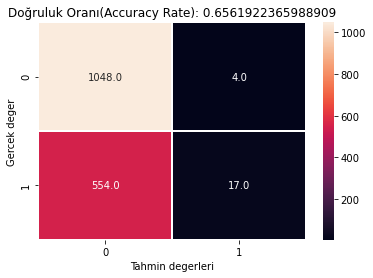

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt=".1f", linewidths=.3)

plt.ylabel('Gercek deger')
plt.xlabel('Tahmin degerleri')
plt.title('Doğruluk Oranı(Accuracy Rate): {0}'.format(DTree.score(x_test, y_test)), size = 12)
plt.show()

In [69]:
#karmasiklik matrisinin detayli analizi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1052
           1       0.81      0.03      0.06       571

    accuracy                           0.66      1623
   macro avg       0.73      0.51      0.42      1623
weighted avg       0.71      0.66      0.53      1623



# random forest

In [70]:
# RandomForestClassifier sınıfından bir nesne ürettik
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model=rf.fit(x_train, y_train)

In [71]:
#tahmin degerleri hesaplanir
y_pred  = rf_model.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
#Doğruluk Oranı(Accuracy Rate) hesaplanir 
accuracy_score(y_test, y_pred)

0.6752926678989526

In [73]:
#karmasiklik matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[774, 278],
       [249, 322]])

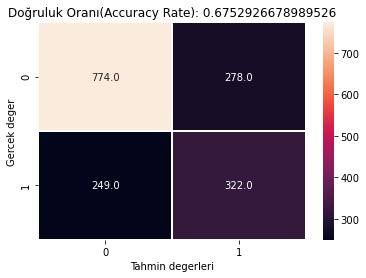

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt=".1f", linewidths=.3)

plt.ylabel('Gercek deger')
plt.xlabel('Tahmin degerleri')
plt.title('Doğruluk Oranı(Accuracy Rate): {0}'.format(rf.score(x_test, y_test)), size = 12)
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1052
           1       0.54      0.56      0.55       571

    accuracy                           0.68      1623
   macro avg       0.65      0.65      0.65      1623
weighted avg       0.68      0.68      0.68      1623



# Tahmin
***erkek-->0<br>
kadin-->1***

In [76]:
#istedigin metni buraya ekleyebilirsin
metin=pd.Series(['aa just for you deliver to your inbox','hi'])

In [77]:
len(metin)

2

In [78]:
description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = description.split()
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)
    
for description in metin:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = description.split()
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)   


In [79]:
from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin 
max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()

In [80]:
description_list[-len(metin):]

['aa just for you deliver to your inbox', 'hi']

In [81]:
sparce_matrix[-len(metin):]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
nb_model.predict(sparce_matrix[-len(metin):])

array([0, 1])

In [83]:
knn_model.predict(sparce_matrix[-len(metin):])

array([0, 1])

In [84]:
lr_model.predict(sparce_matrix[-len(metin):])

array([0, 0])

In [85]:
DTree.predict(sparce_matrix[-len(metin):])

array([0, 0])

In [86]:
rf_model.predict(sparce_matrix[-len(metin):])

array([0, 1])

_____________